In [81]:
import rawpy, imageio

In [82]:
raw = rawpy.imread('./pic/chart.jpg')

In [83]:
print(raw.sizes)

ImageSizes(raw_height=2464, raw_width=3280, height=2464, width=3280, top_margin=0, left_margin=0, iheight=2464, iwidth=3280, pixel_aspect=1.0, flip=0)


In [84]:
import numpy as np

In [85]:
raw_array = raw.raw_image

In [86]:
h, w = raw_array.shape
print(h, w)

2464 3280


In [87]:
import matplotlib.pyplot as plt

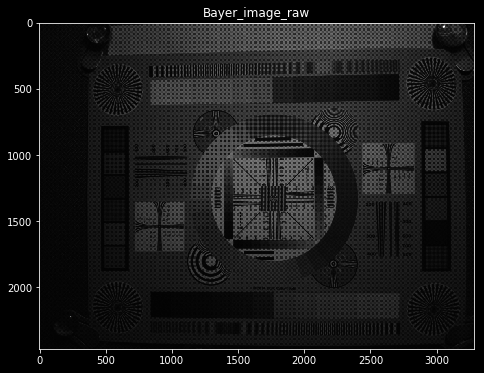

In [88]:
plt.figure(figsize=(8, 6))

plt.imshow(raw_array, cmap='gray')

plt.title(u"Bayer_image_raw")

plt.show()

In [89]:
plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

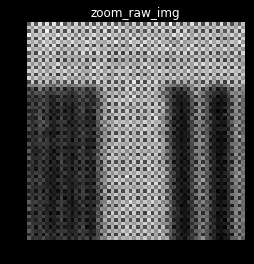

In [90]:
plt.imshow(raw_array[1340:1400, 2640:2700], cmap='gray')
plt.axis('off')
plt.title(u"zoom_raw_img")
plt.show()

In [91]:
print(raw.raw_pattern)


[[2 3]
 [1 0]]


In [92]:
raw_color = np.zeros((h, w, 3))

raw_color[0::2, 0::2, 2] = raw_array[0::2, 0::2]

raw_color[0::2, 1::2, 1] = raw_array[0::2, 1::2]

raw_color[1::2, 0::2, 1] = raw_array[1::2, 0::2]

raw_color[1::2, 1::2, 0] = raw_array[1::2, 1::2]

raw_color[raw_color < 0] = 0
raw_color = raw_color / 1024

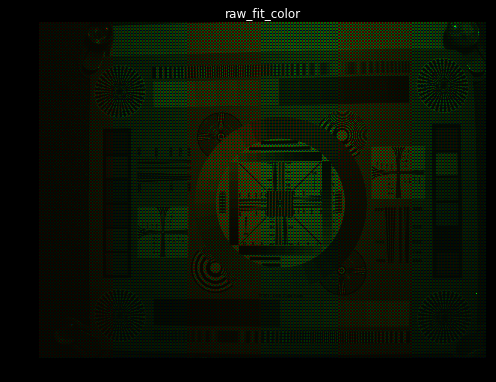

In [93]:
plt.figure(figsize=(8, 8))
plt.imshow(raw_color)
plt.axis('off')
plt.title(u'raw_fit_color')
plt.show()

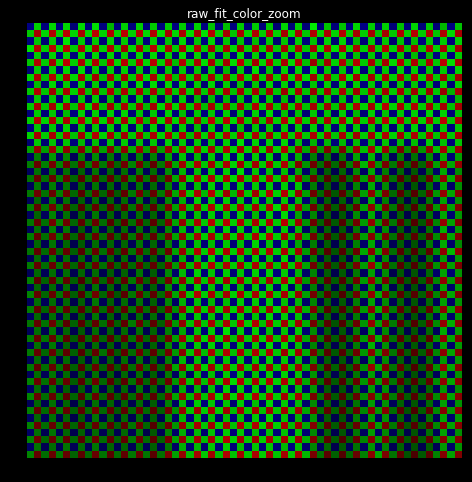

In [94]:
plt.figure(figsize=(8, 8))

digital_gain = 4
plt.imshow(raw_color[1340:1400, 2640:2700] * digital_gain)
plt.axis('off')
plt.title(u'raw_fit_color_zoom')
plt.show()

In [95]:
pattern = raw.raw_pattern
pattern[pattern==3] = 1
print(pattern)

[[2 1]
 [1 0]]


In [75]:
dms_img = np.zeros((h//2, w//2, 3))

for y in range(0, h, 2):
        for x in range(0, w, 2):
                dms_img[y//2, x//2, pattern[0, 0]] += \
                    raw_array[y + 0, x + 0]
                dms_img[y//2, x//2, pattern[0, 1]] += \
                    raw_array[y + 0, x + 1]
                dms_img[y//2, x//2, pattern[1, 0]] += \
                    raw_array[y + 1, x + 0]
                dms_img[y//2, x//2, pattern[1, 1]] += \
                    raw_array[y + 1, x +1]
                dms_img[y//2, x//2, 1] /= 2

In [76]:
dms_img[dms_img < 0] = 0
dms_img /= 1024

plt.figure(figsize=(8, 8))
plt.imshow(dms_img)
plt.axis('off')
plt.title(u'easy_demosaic')
plt.show()

In [96]:
def simple_demosaic(raw_array, pattern):
    """
    簡易デモザイク処理を行う。

    Parameters
    ----------
    raw_array: numpy array
        入力BayerRAW画像データ
    pattern: int[2, 2]
        ベイヤーパターン。0:赤、1:緑、2:青、3:緑。

    Returns

    -------
    dms_img: numpy array
        出力RGB画像。サイズは入力の縦横共に1/2。
    """
    height, width = raw_array.shape
    dms_img = np.zeros((height//2, width//2, 3))
    pattern[pattern == 3] = 1
    dms_img[:, :, pattern[0, 0]] = raw_array[0::2, 0::2]
    dms_img[:, :, pattern[0, 1]] += raw_array[0::2, 1::2]
    dms_img[:, :, pattern[1, 0]] += raw_array[1::2, 0::2]
    dms_img[:, :, pattern[1, 1]] += raw_array[1::2, 1::2]
    dms_img[:, :, 1] /= 2
    return dms_img

In [ ]:
dms_img = simple_demosaic(raw_array, raw.raw_pattern)

dms_img[dms_img < 0] = 0
dms_img /= 1024

plt.figure(figsize=(8, 8))
plt.imshow(dms_img)
plt.axis('off')
plt.title(u'easy_demosaic_by_simple_demosaic')
plt.show()